In [190]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [191]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [192]:
iris = load_iris()
# print(iris.DESCR)
# iris

In [193]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)','sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [194]:
variety = iris.target
variety


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [195]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [196]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [197]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2])

In [198]:
# смотрим разницу факта(y_test) и прогноза (y predict)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result


,0,1
0,1,1
1,1,2
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,2,1
8,0,0
9,2,2


In [199]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
from sklearn.metrics import accuracy_score

In [200]:
accuracy_score(y_test, lda.predict(X_test)) # 8 неверных прогнозов из 38. Средний результат.

0.8157894736842105

In [201]:
# коэффициенты дискриминатных линий - слабая скоррелированность признаков.
lda.coef_

array([[-5.9943412 ,  7.82904455],
       [ 1.7836339 , -3.76846333],
       [ 4.44463548, -4.28616907]])

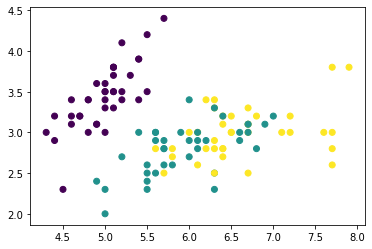

In [202]:
# визуализируем дискриминантную линию: классы 1 и 2 пересекаются, это и является причиной ошибки.
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [203]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [204]:
lda_small.means_ # посмотрим на наши центроиды

array([[4.98421053, 3.44210526],
       [5.95263158, 2.8       ],
       [6.60833333, 2.98888889]])

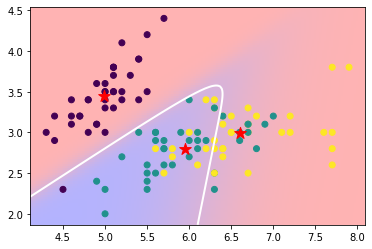

In [205]:
# сам scatter plot
plt.scatter( X_train['sepal length (cm)'],  X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='flat')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [206]:
# Оба признака (d) равноценные с точки зрения влияния на то в какой класс попадет наш показатель.
lda_small.coef_

array([[-5.9943412 ,  7.82904455],
       [ 1.7836339 , -3.76846333],
       [ 4.44463548, -4.28616907]])

In [207]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

0.7894736842105263

In [208]:
# X_train, X_test, y_train, y_test = train_test_split(data['sepal length (cm)'], data['sepal width (cm)'], test_size=0.25)

## Кластеризация KMeans и метод локтя

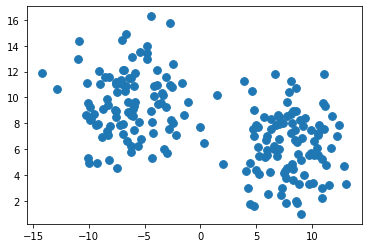

In [209]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [210]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [211]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

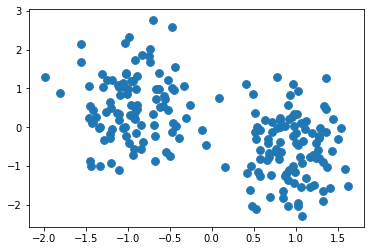

In [212]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [213]:
from sklearn.cluster import KMeans

In [227]:
# указываем количество кластеров исходя из кол-ва классов
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 2, 0, 2, 2, 1, 3, 0, 1, 1, 1, 3, 2, 0, 0, 2, 2, 2, 0, 3, 1,
       3, 3, 1, 3, 2, 1, 3, 0, 0, 3, 1, 1, 3, 3, 3, 3, 1, 1, 0, 1, 1, 0,
       3, 3, 3, 3, 3, 0, 2, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 3, 1, 2, 3, 0, 3, 3, 2, 2, 0, 3, 3, 3, 0, 1, 2, 3, 0, 2, 0, 2,
       1, 3, 2, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 2, 0, 0, 1, 3, 3, 3, 3, 0,
       2, 2, 3, 2, 1, 1, 1, 2, 1, 3, 2, 2, 0, 0, 1, 3, 2, 0, 1, 3, 1, 2,
       3, 1, 2, 2, 2, 0, 3, 1, 0, 3, 3, 1, 0, 0, 0, 2, 1, 0, 3, 1, 2, 0,
       1, 2, 3, 0, 1, 3, 1, 1, 2, 1, 3, 3, 1, 2, 0, 0, 3, 3, 3, 0, 3, 0,
       1, 3, 2, 2, 0, 1, 3, 1, 1, 1, 0, 1, 1, 0, 0, 3, 0, 2, 1, 3, 1, 3,
       3, 0])

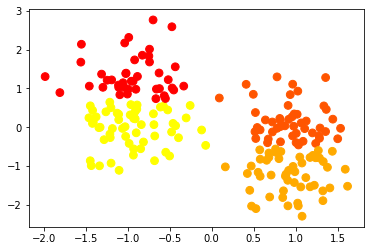

In [228]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [224]:
# строим график локтя для проверки

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

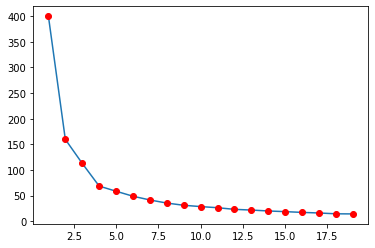

In [221]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
# график показывает на явный изгиб на уровне 4, что меняет наш подход. Т.о. мы разделили наши данные на 4 класстера: ганица 
# по оси X от нуля (вправо/влево), по оси Y от 0,5 (вверх/вниз) и (-0,5) тоже вверх/вниз.
